# CLEAN AND ANALYZE EMPLOYEE EXIT SURVEYS
In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE), you can download the dataset in [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

We'll play the role of Data Analyst and pretend our stakeholders want to know the following : 
 * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction ? What about employees who have been there longer ?


## 1. Introduction

In [206]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# read dataset
dete_survey = pd.read_csv("dete_survey.csv", encoding = "UTF-8") 
tafe_survey = pd.read_csv("tafe_survey.csv", encoding = "UTF-8")

In [145]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [146]:
print(tafe_survey.info())
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

There are many columns in each dataset, some of them wil be used for our purpose :  
In dete_survey :
 * `ID` : An id used to indentify the participant of the survey
 * `SeparationType` : The reason why the person's employment ended
 * `Cease Date` : The year or month the person's employment ended
 * `DETE Start Date` : The year the person began employment with DETE  
In tafe_survey :
* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Let's talk about these dataset, in both dataset, there are many features about employee's information like ID, the start date, the end date, their gender, age, ... , the reasons of their resign which responded by True or False, their feedback about office which responded by their feel like Agree, Strong Agree, Neural, ....

#### Check for any missing value 

In [147]:
dete_survey.isnull().sum() # Check the number of null value in each columns

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In __dete_survey__ dataset, almost columns have serveral missing value, but all columns which have missing value are about the feedback of employess about office.  

Especially, there are some columns with a lot of missing values like `Aboriginal`, `South Sea` , .. It's simple to comprehend since these features verify if someone has special uncommon circumstances. Almost employees didn't have, so the columns have many missing value.  

But, `Classficaton` and `Bussiness Unit` also have a lot of missing values. We cannot make sure what happened with them.

__dete_survey__ also contains 'Not Stated' values (example in `DETE Start Date` ) that indicates missing value, but they aren't represented as NaN 

In [148]:

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
tafe_survey.isnull().sum() # Check the number of null value in each columns

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

It's much more missing values than __dete_survey__, it's can be cause by surveyees  

Both survey have many of same columns but they have different names  

There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## 2. Clean Data
Let's read DETE survey again and make missing values presented by NaN

In [149]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated") # Read file again and set NaN respond to "Not Stated" in raw file

### 1. Drop useless columns

 Recall our target, we want to answer the question : 
 > Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction ? What about employees who have been there longer ?   

We only take care of their resigning, don't care about their feedback, so some columns we can drop for reducing momery and display.


In [150]:
# Drop the feedback and remain the columns about reasons and information of employees.
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1) 
tafe_survey_updated = tafe_survey.drop( tafe_survey.columns[17:66], axis = 1)

### 2. Clean Column Names

#### 2.1. Change the same columns name
First, let's turn our attention to the column names. Each dataframe contains many of the same columns, below are some of the columns we'd like to use for our final analysis. We will standardlize these columns by __dete_survey__:   
| dete_survey  | tafe_survey  | Definition  |
|--------|--------|--------|
| ID | Record ID | 	An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| Age | CurrentAge.CurrentAge | The age of the participant |
| Gender | Gender. What is your Gender? | The gender of the participant |

In [151]:
change_name = {
    'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
} 
tafe_survey_updated.rename(change_name,axis =1, inplace = True)  # Rename the columns in dictionary

#### 2.2. Change columns name to snakecase
Next, we rename all columns in snakecase, friendly with Python

In [152]:
dete_survey_updated.columns = (
    dete_survey_updated.columns
    .str.lower()  # Change sring in lower
    .str.strip()  # remove whitespace end of string
    .str.replace(r'\s+', ' ', regex=True) # Remove all many whitespaces by a whitespace
    .str.replace(' ', '_')  # replace whitespace by '_' 
)

In [153]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

In tafe_survey, the column names are still long useless like Contributing Factors. .We will remove this and change to snakecase

In [154]:
tafe_survey_updated.columns = (
    tafe_survey_updated.columns
    .str.replace("Contributing Factors. ", "")
    .str.replace("-", "")
    .str.replace(r"\s+", ' ', regex = True)
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [155]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          702 non-null    float64
 1   institute                   702 non-null    object 
 2   workarea                    702 non-null    object 
 3   cease_date                  695 non-null    float64
 4   separationtype              701 non-null    object 
 5   career_move_public_sector   437 non-null    object 
 6   career_move_private_sector  437 non-null    object 
 7   career_move_selfemployment  437 non-null    object 
 8   ill_health                  437 non-null    object 
 9   maternity/family            437 non-null    object 
 10  dissatisfaction             437 non-null    object 
 11  job_dissatisfaction         437 non-null    object 
 12  interpersonal_conflict      437 non-null    object 
 13  study                       437 non

#### 2.3 Filter the Data
Recall our goal, we only want to observe the employee who resigned, so we don't care to others reason of stopping.

In [156]:
dete_survey_updated["separationtype"].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [157]:
tafe_survey_updated["separationtype"].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In dete_survey, we will remain the rows have `separationtype` value starts by Resignation. And in tafe_survey, we only care to "Resignation" value.

In [158]:
critiea_dete = dete_survey_updated["separationtype"].str.contains("Resignation", regex = True) # Choose the rows have "Resignation" in column separationtype
critiea_tafe = tafe_survey_updated["separationtype"] == "Resignation"

In [159]:
dete_resignation = dete_survey_updated.loc[critiea_dete]
dete_resignation.is_copy = None # prevent warning
tafe_resignation = tafe_survey_updated.loc[critiea_tafe]
tafe_resignation.is_copy = None


In [160]:
dete_resignation.head(10)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [161]:
tafe_resignation.head(10)

,id,institute,workarea,cease_date,separationtype,career_move_public_sector,career_move_private_sector,career_move_selfemployment,ill_health,maternity/family,dissatisfaction,job_dissatisfaction,interpersonal_conflict,study,travel,other,none,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,Contributing Factors. Dissatisfaction,Job Dissatisfaction,-,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


#### 2.4 Verify the Data
After some data cleaning steps, we still observe some non-synchronous in `cease_date`.  
In dete_resignation and tafe_resignation, column `cease_date` is in object type and some rows have month in value.  
We want to change them to datetime

In [162]:
print(dete_resignation["cease_date"].value_counts())


cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64


In [163]:
print(tafe_resignation["cease_date"].value_counts())

cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: count, dtype: int64


In [164]:
pd.options.mode.chained_assignment = None # No Warning presents

year_dete = dete_resignation["cease_date"].str.extract(r"([1-2][0-9]{3})")  # catch year string in each row
dete_resignation["cease_date"] = year_dete.astype(float) # change year to float


In [165]:
print(dete_resignation["cease_date"].value_counts().sort_values(ascending = True))


cease_date
2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: count, dtype: int64


In [166]:
print(tafe_resignation["cease_date"].value_counts().sort_values(ascending = True)) 

cease_date
2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: count, dtype: int64


We can verify :
* There aren't any majors issues with the years
* The years in each dataframe don't span quite the same number of years. We'll leave it up to your discretion to drop any years you don't think are needed for the analysis.

In tafe_survey, we immediately know the number of years the employee serviced in institute. But in dete_survey, we haven't it yet. We must create a new column names `institute_service` to present the years employee serviced in DETE

In [167]:
# take different between end date and start date
dete_resignation["institute_service"] = dete_resignation["cease_date"] - dete_resignation["dete_start_date"] # Take the years of service

<Axes: >

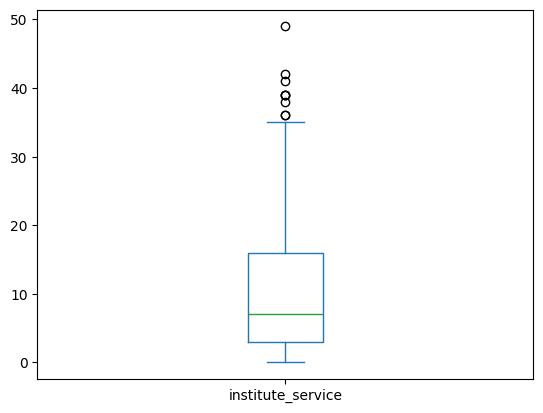

In [168]:
dete_resignation["institute_service"].plot(kind = "box")  

There can be some outliers in `institute_service`, but it's not important.

Because we care to someone which were disatisfied, so we will categorize employees as "disatisfied" from each dataframe.  
1. tafe_survey_updated:
* `dissatisfaction`
* `job Dissatisfaction`
2. dete_survey_updated:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.



In [169]:
tafe_resignation["job_dissatisfaction"].value_counts(dropna = False) 

job_dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [170]:
tafe_resignation["dissatisfaction"].value_counts(dropna= False)

dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

> In dete_survey, answer has two value : True or False, but tafe_survey hasn't. We will convert values in two columns of tafe_survey. False replace for "-", and True for "Dissatisfaction"

In [171]:
def update_val(x):
    if pd.isnull(x):
        return np.nan  
    elif x == "-" :
        return False
    else :
        return True 

In [172]:
tafe_resignation["dissatisfaction"] = tafe_resignation["dissatisfaction"].map(update_val)    # update new value by map() function
tafe_resignation["job_dissatisfaction"] = tafe_resignation["job_dissatisfaction"].map(update_val) 
tafe_resignation["dissatisfied"] = tafe_resignation["dissatisfaction"] + tafe_resignation["job_dissatisfaction"]  # if use | , nan + nan is false, so I use +

In [173]:
print(tafe_resignation["dissatisfaction"].notnull().sum())
print(tafe_resignation["job_dissatisfaction"].notnull().sum())
tafe_resignation[["dissatisfaction","job_dissatisfaction","dissatisfied"]].head(20)


332
332


,dissatisfaction,job_dissatisfaction,dissatisfied
3,False,False,0
4,False,False,0
5,False,False,0
6,False,False,0
7,False,False,0
8,False,False,0
9,False,False,0
10,False,False,0
13,False,False,0
14,True,True,2


It has a problem, `dissatisfied` isn't boolean type. We will chang it one more time

In [174]:
tafe_resignation = tafe_resignation.dropna( subset = ["dissatisfied"])  # drop rows have NaN in column 'dissatisfied'
tafe_resignation["dissatisfied"] = tafe_resignation["dissatisfied"].map(lambda x : x > 0) # chang value to True, False

In [175]:
tafe_resignation["dissatisfied"].value_counts()

dissatisfied
False    241
True      91
Name: count, dtype: int64

Nice !! Now we have a columns `dissatisfied` in tafe_survey that indicate who wasn't dissatisfied with job or officer. Let's do the same with __dete_survey__

In [176]:
column = ["job_dissatisfaction", "dissatisfaction_with_the_department",
          "physical_work_environment","lack_of_recognition","lack_of_job_security",
          "work_location","employment_conditions","work_life_balance","workload"]
critiea = False
for i in column:
    critiea =  dete_resignation[i] + critiea


In [177]:
dete_resignation["dissatisfied"] = critiea
dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


Next step, if we compare dete_survey and tafe_survey in `institute_service`, we will realize the different. In dete_survey, the values is exactly the years service of employees, but in tafe_survey, they are ranges.

In [178]:
tafe_resignation["institute_service"].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: count, dtype: int64

But, we want to categorize both columns by below : 
* New: Less than 3 years at a company ( <= 3 )
* Experienced: 3-6 years at a company ( 3 < years <= 6)
* Established: 7-10 years at a company ( 6 < years <= 10 )
* Veteran: 11 or more years at a company ( 10 < year )

There isn't any principal to define how new is, how experienced is,... so depend our define, we will categorize them by our way  

First, let's do it with tafe_survey, it's easier than dete_survey

In [179]:
map_institute_service = {
    "Less than 1 year" : "New",
    "1-2" : "New",
    "3-4": "Experienced",
    "5-6" : "Experienced",
    "7-10" : "Established",
    "11-20" : "Veteran",
    "More than 20 years" : "Veteran"
}
tafe_resignation["institute_service"] = tafe_resignation["institute_service"].map(map_institute_service).copy()
tafe_resignation["institute_service"].value_counts()

institute_service
New            137
Experienced     96
Veteran         36
Established     21
Name: count, dtype: int64

In [180]:
# Define bins and labels
bins = [0, 3, 6, 10, float('inf')]
labels = ['New', 'Experienced', 'Established', 'Veteran']

# Apply pd.cut()
dete_resignation['institute_service'] = pd.cut(dete_resignation['institute_service'], bins=bins, labels=labels, right=False)

Perfectly, let's combine two dataset
#### 2.5. Combine
Before we combined two dataset, make a mark this rows belong to which office 

In [181]:
dete_resignation["age"].value_counts()

age
41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger     1
Name: count, dtype: int64

In [182]:
tafe_resignation["age"].value_counts()

age
41  45           45
46  50           39
51-55            39
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
20 or younger     9
Name: count, dtype: int64

We must convert `age` of tafe_survey into correct form 

In [183]:
tafe_resignation["age"] = tafe_resignation["age"].str.replace("  ", "-") # It's trick since two number have two whitespace, 
                                                                         # so I can replace them by - , not impact to "56 or older" ,...
tafe_resignation["age"].value_counts()

age
41-45            45
46-50            39
51-55            39
21-25            33
36-40            32
31-35            32
26-30            32
56 or older      29
20 or younger     9
Name: count, dtype: int64

In [185]:
data_combined = pd.concat([dete_resignation, tafe_resignation]) #combine two set

In [291]:
data_combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,workarea,career_move_public_sector,career_move_private_sector,career_move_selfemployment,dissatisfaction,interpersonal_conflict,study,travel,other,none,role_service
3,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,Established,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,Veteran,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,Experienced,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,Veteran,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,Experienced,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's is a good dataset, but we must do final clean step. We will remove som unnecessery columns.

In [292]:
data_final = data_combined.dropna(thresh = 500, axis = 1) # Remove column has under 500 notnull 
data_final.head()

,id,separationtype,cease_date,position,employment_status,job_dissatisfaction,maternity/family,ill_health,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,False,False,False,Female,36-40,Established,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,False,True,False,Female,41-45,Veteran,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,False,False,False,Female,31-35,Experienced,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,True,False,False,Female,46-50,Veteran,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,False,True,False,Male,31-35,Experienced,False,DETE


Perfect, let's go to final step
## 3. Analyze  
Recall the question : 
> Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction ? What about employees who have been there longer ?

First of all, we will observe the ratio of new employees resign purpose :

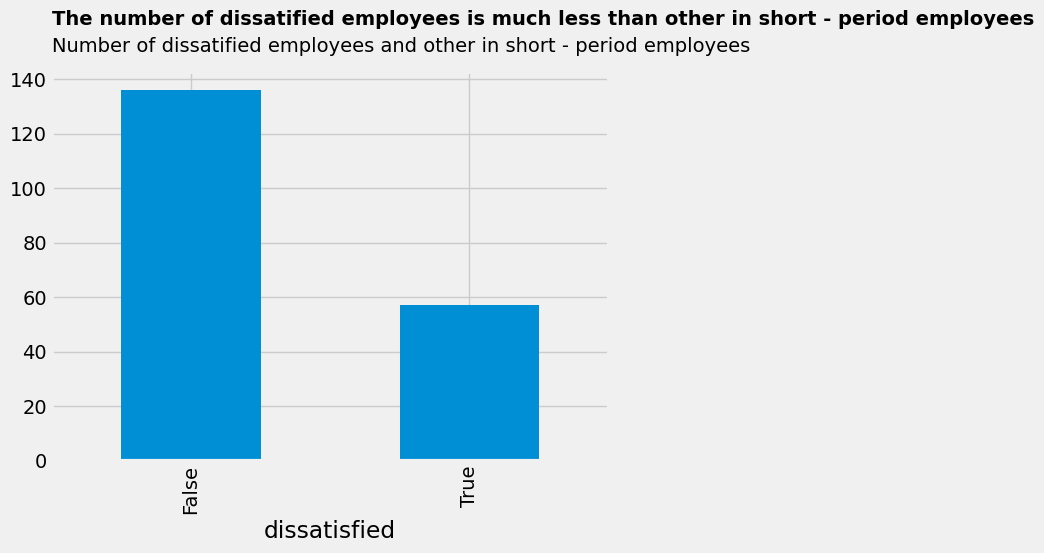

In [299]:
new_employees = data_final[data_final["institute_service"] == "New"]
new_employees["dissatisfied"].value_counts().plot.bar()
plt.text(s = "Number of dissatified employees and other in short - period employees", x = -0.5, y = 150)
plt.text(s = "The number of dissatified employees is much less than other in short - period employees", x = -0.5, y = 160, weight = "bold")
plt.show()

The number of new employees who resigned since dissatisfication is less than others reason

#### Multiple bar about the number of dissatisfication in each age

In [263]:
# create the true 
plt.style.use("fivethirtyeight")
size_group = data_final.groupby("institute_service")["dissatisfied"].size()
true_group = data_final.groupby("institute_service")["dissatisfied"].sum()
false_group = size_group - true_group


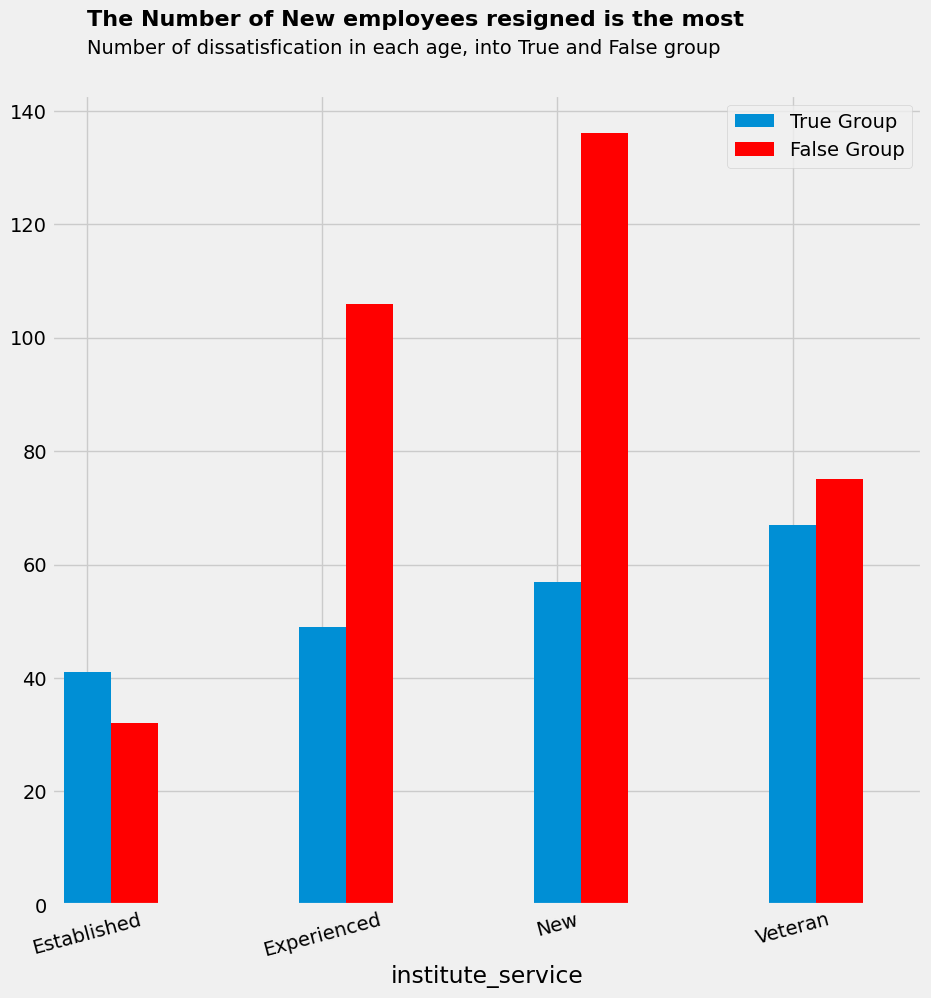

In [279]:
fig, ax = plt.subplots(figsize = (10,10))
true_group.plot.bar( width = 0.2, label = "True Group")
false_group.plot.bar( width = 0.2, position = -0.5, color = "red", label = "False Group")
plt.legend()
plt.xticks(rotation = 15)
ax.text(s = "The Number of New employees resigned is the most", x = 0, y= 155, weight = "bold", fontsize = 16)
ax.text(s = "Number of dissatisfication in each age, into True and False group", x = 0, y= 150, fontsize = 14)
plt.show()

#### It's about amount of each age, how about ratio

In [280]:
ratio = true_group / size_group

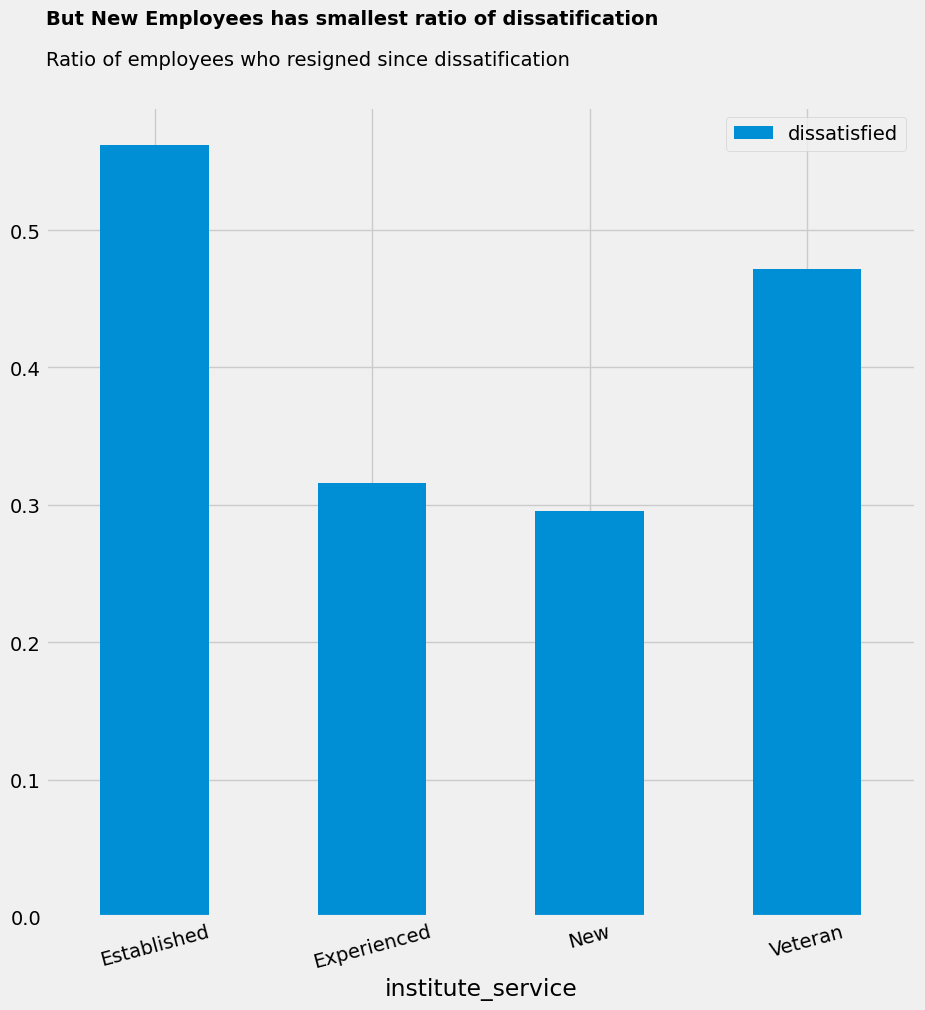

In [290]:
ratio.plot.bar(figsize = (10,10))
plt.xticks(rotation = 15)
plt.text(s = "Ratio of employees who resigned since dissatification", x = -0.5, y = 0.62)
plt.text(s = "But New Employees has smallest ratio of dissatification", x = -0.5, y = 0.65, weight = "bold", fontsize = 14)
plt.legend()

In [293]:
ratio_of_new_employess = size_group["New"] / size_group.sum()*100
ratio_of_new_employess_dissatified = true_group["New"] / size_group["New"]*100
ratio_of_new_employess_dissatified_vs_non = true_group["New"] / false_group["New"] *100

In [294]:
print(ratio_of_new_employess)
print(ratio_of_new_employess_dissatified)
print(ratio_of_new_employess_dissatified_vs_non)

34.280639431616336
29.533678756476682
41.911764705882355


# 3. REPORT
(Suppose we must make a report to our sir )

Dear my Sir !  
After a long time working with dataset about Education Institutes of Queenland, to answer your question : 
>Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction ? What about employees who have been there longer ?

 I have explored it and feel excited to tell you what happen:   
 * In short - period employees ( less than 3 years service ), the reason of resigning : "dissatisfied "  has the number less than other reasons. Here is graph. ( __The ratio between True and False dissatisfied is 42%__ )
 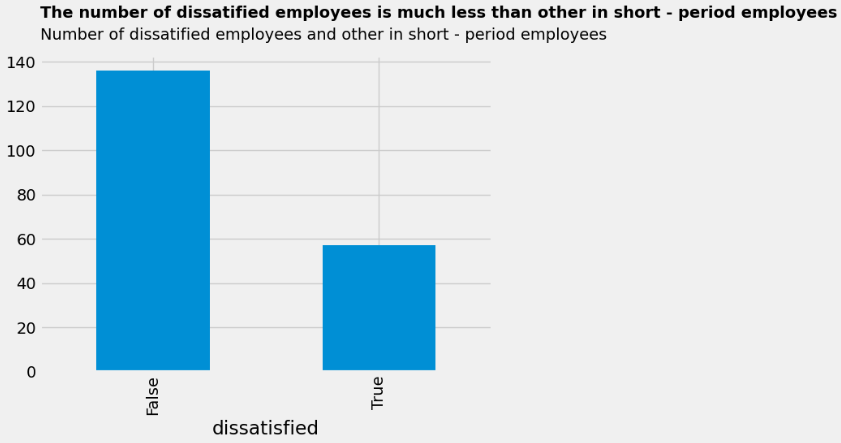  
 __How about when we compare short - period group to others group ?__
 * First, New employees is the most group has the resigned number ( __about 34.2 %__ )
   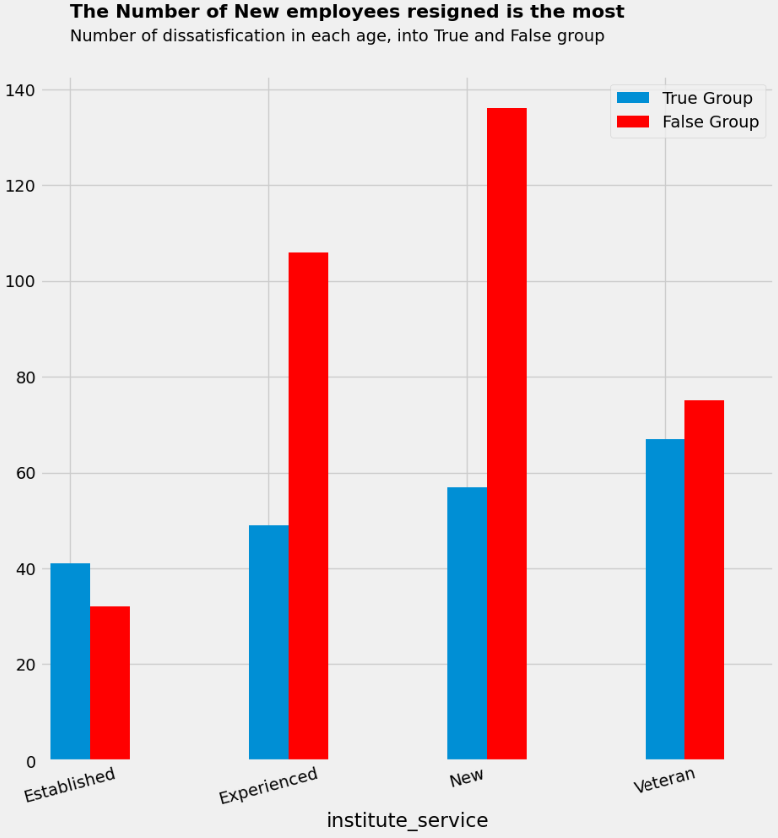
 * But, ratio of dissatisfied employees in New group is the smallest ( __only 30%__)
   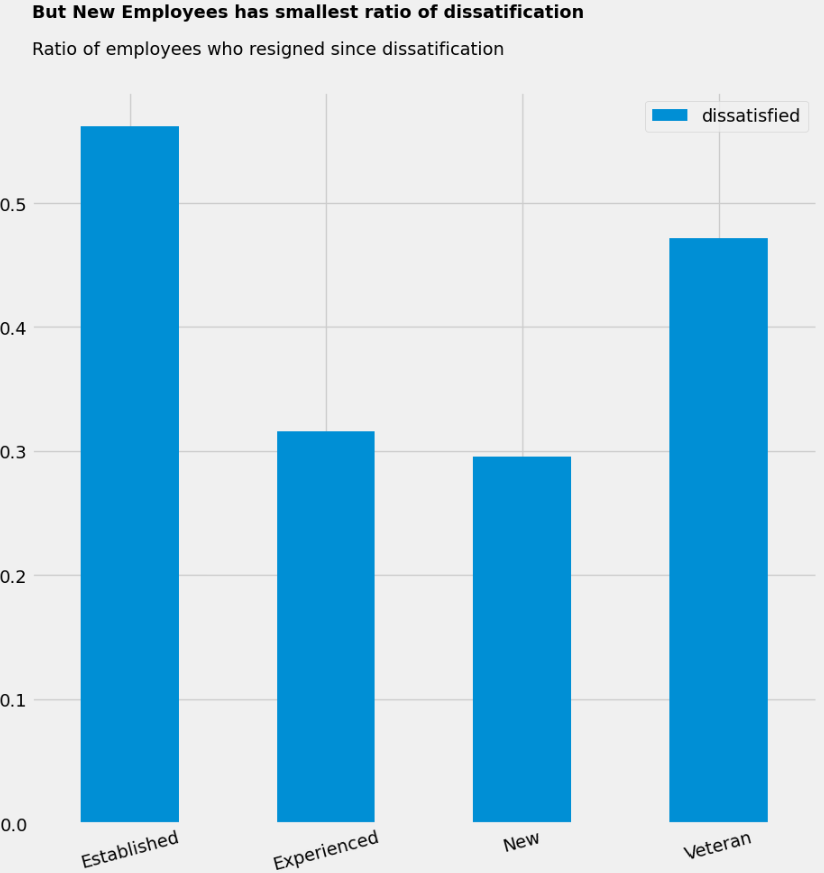